In [1]:
import os
import re
import string
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
 
chrome_options = Options()

browser = webdriver.Chrome(executable_path= os.getcwd()+'/chromedriver')
from pandas import *
import matplotlib.pyplot as plt
from sqlalchemy import *

from lxml import html
import requests

In [2]:
url = 'https://stats.nba.com/players/isolation/?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url)

In [3]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [4]:
player1 = []
player_iso = []
players = []

for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            player_iso.append(temp)
        
        temp2 = re.findall("\D+", lines)
        player1.append(temp2)
players_x = player1[581:868]
for i in players_x:
    players.append(''.join(i))

print(players)

['Aaron Gordon', 'Aaron Holiday', 'Abdel Nader', 'Al Horford', 'Al-Farouq Aminu', 'Alec Burks', 'Alex Caruso', 'Alex Len', 'Allonzo Trier', 'Andre Drummond', 'Andre Iguodala', 'Andrew Harrison', 'Andrew Wiggins', 'Anthony Davis', 'Antonio Blakeney', 'Austin Rivers', 'Austin Rivers', 'Avery Bradley', 'Avery Bradley', 'Bam Adebayo', 'Ben Simmons', 'Blake Griffin', 'Bobby Portis', 'Bobby Portis', 'Bogdan Bogdanovic', 'Bojan Bogdanovic', 'Bradley Beal', 'Brandon Ingram', 'Brandon Knight', 'Brook Lopez', 'Bruce Brown', 'Bryn Forbes', 'Buddy Hield', 'CJ McCollum', 'Cameron Payne', 'Caris LeVert', 'Carmelo Anthony', 'Chandler Parsons', 'Chasson Randle', 'Chris Paul', 'Christian Wood', 'Cody Zeller', 'Collin Sexton', 'Cory Joseph', "D'Angelo Russell", 'D.J. Augustin', 'Damian Lillard', 'Damyean Dotson', 'Danilo Gallinari', 'Danny Green', 'Dante Exum', 'Danuel House Jr.', 'Dario Saric', 'Darius Miller', 'Darren Collison', 'David Nwaba', "De'Aaron Fox", "DeAndre' Bembry", 'DeMar DeRozan', 'DeMar

In [5]:
db_iso = pd.DataFrame(player_iso)
db_iso.columns = ['GP','Poss','Freq-I','PPP-I', 'PTS','FGM','FGA','FG%-I','EFG%-I','FT-FREQ-I','TOV-FREQ-I','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-I','PERCENTILE']
db_iso.astype('float').dtypes
db_iso.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_iso.insert(0, 'Player',players)
db_iso

,Player,GP,Freq-I,PPP-I,FG%-I,EFG%-I,FT-FREQ-I,TOV-FREQ-I,SCORE-FREQ-I
0,Aaron Gordon,78,6.0,0.79,36.5,38.9,11.4,12.7,36.7
1,Aaron Holiday,50,4.0,0.85,41.7,45.8,0.0,0.0,38.5
2,Abdel Nader,60,4.9,1.33,77.8,83.3,8.3,16.7,66.7
3,Al Horford,68,2.8,1.21,58.3,58.3,4.2,0.0,58.3
4,Al-Farouq Aminu,81,3.4,1.04,47.4,47.4,20.0,12.0,48.0
5,Alec Burks,34,11.4,0.84,34.9,40.7,12.2,6.1,34.7
6,Alex Caruso,25,5.3,1.15,60.0,70.0,7.7,15.4,53.8
7,Alex Len,76,1.5,0.50,27.3,27.3,0.0,8.3,25.0
8,Allonzo Trier,64,10.6,1.00,45.8,50.0,19.2,6.4,50.0
9,Andre Drummond,79,2.6,0.84,38.5,38.5,18.9,13.5,43.2


In [6]:
url2 = 'https://stats.nba.com/players/transition/?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url2)

In [7]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [8]:
player_transition_stats = []
player2 = []
players2 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            player_transition_stats.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player2.append(temp2)

players_y = player2[923:1381]
for i in players_y:
    players2.append(''.join(i))

print(len(player_transition_stats))

458


In [9]:
db_transition = pd.DataFrame(player_transition_stats)
db_transition.columns = ['GP','Poss','FREQ-T','PPP-T', 'PTS','FGM','FGA','FG%-T','EFG%-T','FT-FREQ-T','TOV-FREQ-T','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-T','PERCENTILE']
db_transition.astype('float').dtypes
db_transition.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_transition.insert(0, 'Player',players2)
db_transition

,Player,GP,FREQ-T,PPP-T,FG%-T,EFG%-T,FT-FREQ-T,TOV-FREQ-T,SCORE-FREQ-T
0,Aaron Gordon,78,14.0,1.04,54.2,60.3,13.6,16.8,50.0
1,Aaron Holiday,50,18.9,1.03,44.4,51.1,21.3,11.5,47.5
2,Abdel Nader,60,23.6,1.09,50.0,58.3,17.2,13.8,50.0
3,Al Horford,68,8.5,1.00,55.4,59.8,5.5,20.5,45.2
4,Al-Farouq Aminu,81,15.4,1.18,53.8,60.0,21.1,14.0,53.5
5,Alec Burks,34,13.3,0.81,36.8,38.2,21.1,15.8,42.1
6,Alec Burks,17,12.5,1.00,42.9,50.0,11.1,11.1,44.4
7,Alex Abrines,31,17.5,0.74,31.0,39.7,0.0,6.5,29.0
8,Alex Caruso,25,14.7,1.14,50.0,56.3,27.8,8.3,58.3
9,Alex Len,76,8.6,1.24,60.4,63.2,19.7,5.6,64.8


url3 = 'https://stats.nba.com/players/hustle/?Season=2018-19&SeasonType=Regular%20Season'
browser.get(url3)

browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

player_hustle_stats = []
player3 = []
players3 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            player_hustle_stats.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player3.append(temp2)

players_z = player3[1073:1603]
for i in players_z:
    players3.append(''.join(i))
print(len(players3))
player_hustle = player_hustle_stats[2:532]

db_hustle = pd.DataFrame(player_hustle)
db_hustle.columns = ['Age','GP','MIN','Screen Assists','Screen Assists Pts', 'Deflections','OFF Loose Balls Rec','DEF Loose Balls Rec','Loose Balls Rec','%OFF Loose Balls Rec','%DEF Loose Balls Rec','Charges Drawn','Contested 2s','Contested 3s', 'Contested Shots']
db_hustle.astype('float').dtypes
db_hustle.drop(['MIN','OFF Loose Balls Rec','DEF Loose Balls Rec','%OFF Loose Balls Rec','%DEF Loose Balls Rec'], axis = 1, inplace = True)
db_hustle.insert(0, 'Player',players3)
db_hustle

In [10]:
url4 = 'https://stats.nba.com/players/ball-handler/#!?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url4)

In [12]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [13]:
pr_ball_handler = []
player4 = []
players4 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            pr_ball_handler.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player4.append(temp2)

        
players_a = player4[623:931]
for i in players_a:
    players4.append(''.join(i))

In [14]:
db_prb = pd.DataFrame(pr_ball_handler)
db_prb.columns = ['GP','Poss','FREQ-PRB','PPP-PRB', 'PTS','FGM','FGA','FG%-PRB','EFG%-PRB','FT-FREQ-PRB','TOV-FREQ-PRB','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-PRB','PERCENTILE']
db_prb.astype('float').dtypes
db_prb.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_prb.insert(0, 'Player',players4)
db_prb

,Player,GP,FREQ-PRB,PPP-PRB,FG%-PRB,EFG%-PRB,FT-FREQ-PRB,TOV-FREQ-PRB,SCORE-FREQ-PRB
0,Aaron Gordon,78,12.1,0.77,38.3,42.9,7.6,18.4,34.8
1,Aaron Holiday,50,32.2,0.80,36.7,41.7,3.8,10.6,34.6
2,Abdel Nader,60,8.9,0.77,41.2,41.2,9.1,18.2,36.4
3,Al-Farouq Aminu,81,2.2,0.56,15.4,15.4,18.8,0.0,31.3
4,Alec Burks,34,27.1,0.69,30.7,33.5,12.1,14.7,32.8
5,Alec Burks,17,29.9,0.74,29.7,33.8,9.3,7.0,32.6
6,Alex Abrines,31,7.9,1.21,66.7,83.3,7.1,28.6,50.0
7,Alex Caruso,25,41.6,0.82,39.5,44.7,10.8,17.6,36.3
8,Allen Crabbe,43,3.2,0.57,20.0,30.0,7.1,21.4,21.4
9,Allonzo Trier,64,33.6,0.80,40.1,44.1,13.4,21.1,38.5


In [15]:
url5 = 'https://stats.nba.com/players/roll-man/?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url5)

In [16]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [17]:
pr_roll_man = []
player5 = []
players5 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            pr_roll_man.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player5.append(temp2)

players_b = player5[409:610]
for i in players_b:
    players5.append(''.join(i))

In [18]:
db_prm = pd.DataFrame(pr_roll_man)
db_prm.columns = ['GP','Poss','FREQ-PRM','PPP-PRM', 'PTS','FGM','FGA','FG%-PRM','EFG%-PRM','FT-FREQ-PRM','TOV-FREQ-PRM','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-PRM','PERCENTILE']
db_prm.astype('float').dtypes
db_prm.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_prm.insert(0, 'Player',players5)
db_prm

,Player,GP,FREQ-PRM,PPP-PRM,FG%-PRM,EFG%-PRM,FT-FREQ-PRM,TOV-FREQ-PRM,SCORE-FREQ-PRM
0,Aaron Gordon,78,2.6,0.91,37.5,42.2,11.8,2.9,38.2
1,Al Horford,68,31.6,1.15,54.8,60.7,4.8,6.6,52.0
2,Al-Farouq Aminu,81,3.5,1.35,50.0,63.6,15.4,0.0,57.7
3,Alex Abrines,31,5.6,0.60,22.2,33.3,0.0,10.0,20.0
4,Alex Len,76,19.7,1.09,53.6,58.4,19.8,5.6,53.7
5,Alex Poythress,21,17.9,1.32,53.8,57.7,36.8,5.3,63.2
6,Amir Johnson,51,12.3,1.19,58.3,62.5,7.4,11.1,51.9
7,Andre Drummond,79,14.8,1.09,58.8,58.8,18.6,9.0,56.2
8,Ante Zizic,59,22.0,1.16,60.8,60.8,14.1,8.1,59.6
9,Anthony Davis,56,14.1,1.02,47.1,49.4,15.5,4.8,50.3


In [19]:
url6 = 'https://stats.nba.com/players/playtype-post-up/?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url6)

In [24]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [25]:
post_up = []
player6 = []
players6 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            post_up.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player6.append(temp2)

players_c = player6[397:592]
for i in players_c:
    players6.append(''.join(i))

In [26]:
db_post = pd.DataFrame(post_up)
db_post.columns = ['GP','Poss','FREQ-Post','PPP-Post', 'PTS','FGM','FGA','FG%-Post','EFG%-Post','FT-FREQ-Post','TOV-FREQ-Post','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-Post','PERCENTILE']
db_post.astype('float').dtypes
db_post.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_post.insert(0, 'Player',players6)
db_post

,Player,GP,FREQ-Post,PPP-Post,FG%-Post,EFG%-Post,FT-FREQ-Post,TOV-FREQ-Post,SCORE-FREQ-Post
0,Aaron Gordon,78,13.2,0.84,42.0,42.0,14.5,9.2,42.8
1,Al Horford,68,16.5,0.99,53.0,53.0,9.2,12.7,47.9
2,Alec Burks,34,2.6,0.91,44.4,44.4,9.1,9.1,45.5
3,Alex Len,76,10.9,1.10,58.3,58.3,22.2,17.8,54.4
4,Andre Drummond,79,18.5,0.84,44.6,44.6,11.8,12.9,43.3
5,Andrew Wiggins,73,8.0,0.74,39.6,39.6,9.3,13.6,39.0
6,Ante Zizic,59,23.1,0.68,43.3,43.3,11.5,25.0,36.5
7,Anthony Davis,56,18.3,0.97,43.2,43.2,21.4,5.8,50.6
8,Aron Baynes,51,6.8,1.10,62.5,62.5,5.0,15.0,55.0
9,Bam Adebayo,82,7.2,0.86,45.7,45.7,15.7,17.6,43.1


In [27]:
url7 = 'https://stats.nba.com/players/spot-up/?SeasonYear=2018-19&SeasonType=Regular%20Season&sort=PLAYER_NAME&dir=-1'
browser.get(url7)

In [28]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [29]:
spot_up = []
player7 = []
players7 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            spot_up.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player7.append(temp2)

print(len(player7))
players_d = player7[923:1381]
for i in players_d:
    players7.append(''.join(i))


1381


In [30]:
db_spot = pd.DataFrame(spot_up)
db_spot.columns = ['GP','Poss','FREQ-Spot','PPP-Spot', 'PTS','FGM','FGA','FG%-Spot','EFG%-Spot','FT-FREQ-Spot','TOV-FREQ-Spot','SF-FREQ', 'AND-ONE-FREQ','SCORE-FREQ-Spot','PERCENTILE']
db_spot.astype('float').dtypes
db_spot.drop(['Poss','PTS','FGM','FGA','SF-FREQ','AND-ONE-FREQ','PERCENTILE'], axis = 1, inplace = True)
db_spot.insert(0, 'Player',players7)
db_spot

,Player,GP,FREQ-Spot,PPP-Spot,FG%-Spot,EFG%-Spot,FT-FREQ-Spot,TOV-FREQ-Spot,SCORE-FREQ-Spot
0,Aaron Gordon,78,20.4,1.00,39.1,51.7,8.6,6.4,40.1
1,Aaron Holiday,50,23.8,1.05,39.4,53.5,3.9,5.2,39.0
2,Abdel Nader,60,49.2,0.88,36.4,46.4,4.1,7.4,34.7
3,Al Horford,68,17.6,1.09,43.0,56.0,3.3,4.6,42.1
4,Al-Farouq Aminu,81,47.0,0.95,36.4,48.7,5.2,6.6,37.1
5,Alec Burks,34,18.7,1.24,45.9,62.2,5.0,3.8,46.3
6,Alec Burks,17,23.6,1.03,44.0,54.0,14.7,17.6,41.2
7,Alex Abrines,31,42.4,1.07,37.5,54.2,1.3,2.7,37.3
8,Alex Caruso,25,14.7,1.00,34.4,50.0,5.6,5.6,36.1
9,Alex Len,76,21.3,1.06,38.0,54.3,2.9,4.0,38.3


In [31]:
url7 = 'https://stats.nba.com/players/traditional/?sort=PLAYER_NAME&dir=-1&Season=2018-19&SeasonType=Regular%20Season'
browser.get(url7)

In [35]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [36]:
general = []
player8 = []
players8 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            general.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player8.append(temp2)

print(len(player8))
players_e = player8[1061:1591]
for i in players_e:
    players8.append(''.join(i))

db_general = pd.DataFrame(general)
db_general
db_general.columns = ['Age','GP','W','L','MIN', 'PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','PF','FP','DD2','TD3','+/-']
db_general.astype('float').dtypes
db_general.drop(['Age','GP','W','L','MIN', 'PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','PF','DD2','TD3','+/-'], axis = 1, inplace = True)
db_general.insert(0, 'Player',players8)
db_general
dictr = {}
for index,row in db_general.iterrows():
    dictr[row['Player']] = row['FP']

2651


ValueError: Length mismatch: Expected axis has 20 elements, new values have 27 elements

In [37]:
url8 = 'https://stats.nba.com/players/advanced/?sort=GP&dir=-1&Season=2018-19&SeasonType=Regular%20Season'
browser.get(url8)

In [39]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [40]:
advanced = []
player9 = []
players9 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            advanced.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player9.append(temp2)
advanced2 = advanced[:1060]
players_f = player9[1592:2651]
count = 0
for i in players_f:
    if(count%2 == 0):
        players9.append(''.join(i))
        count += 1
    else:
        count += 1
advanced3 = []
for i in advanced2:
    if(count%2 == 0):
        advanced3.append(i)
        count += 1
    else:
        count += 1
    
    
        
print(len(advanced3))
print(len(players9))

530
530


In [41]:
db_advanced = pd.DataFrame(advanced3)
db_advanced.columns = ['Age','GP','W','L','MIN', 'OFFRTG','DEFRTG','NETRTG','AST%','AST/TO','AST RATIO','OREB%','DREB%','REB%','TO RATIO','EFG%','TS%','USG%','PACE','PIE']
db_advanced.astype('float').dtypes
db_advanced.drop(['W','L','MIN','USG%','PACE','PIE'], axis = 1, inplace = True)
print(len(advanced))
db_advanced.insert(0, 'Player',players9)
db_advanced

1590


,Player,Age,GP,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%
0,Bam Adebayo,21,82,105.0,104.5,0.5,14.6,1.52,20.7,8.3,22.1,15.1,13.6,57.9,62.3
1,Bradley Beal,26,82,111.6,113.5,-1.8,23.3,2.00,18.2,2.8,10.4,6.6,9.1,54.0,58.1
2,Bryn Forbes,25,82,109.9,110.2,-0.3,10.5,2.19,16.3,0.8,9.6,5.3,7.5,56.8,58.6
3,Buddy Hield,26,82,109.4,110.0,-0.6,11.7,1.40,11.5,3.6,11.0,7.2,8.2,56.0,58.7
4,Collin Sexton,20,82,105.6,118.1,-12.5,15.4,1.31,13.9,2.1,7.2,4.5,10.6,48.0,52.0
5,Cory Joseph,27,82,107.6,102.4,5.2,20.8,4.01,33.1,1.9,11.1,6.6,8.3,46.3,47.4
6,DeAndre' Bembry,24,82,104.5,109.4,-5.0,15.0,1.42,19.8,2.6,14.8,8.6,13.9,48.7,50.8
7,Joe Ingles,31,82,109.2,101.6,7.7,26.2,2.43,30.9,1.3,10.8,6.1,12.7,56.5,58.1
8,Justin Holiday,30,82,102.4,110.1,-7.7,8.4,1.40,13.7,1.7,10.3,6.0,9.7,49.0,52.0
9,Kemba Walker,29,82,112.1,111.8,0.4,28.7,2.29,18.9,1.7,10.6,6.0,8.2,51.1,55.8


In [42]:
db_advanced

,Player,Age,GP,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%
0,Bam Adebayo,21,82,105.0,104.5,0.5,14.6,1.52,20.7,8.3,22.1,15.1,13.6,57.9,62.3
1,Bradley Beal,26,82,111.6,113.5,-1.8,23.3,2.00,18.2,2.8,10.4,6.6,9.1,54.0,58.1
2,Bryn Forbes,25,82,109.9,110.2,-0.3,10.5,2.19,16.3,0.8,9.6,5.3,7.5,56.8,58.6
3,Buddy Hield,26,82,109.4,110.0,-0.6,11.7,1.40,11.5,3.6,11.0,7.2,8.2,56.0,58.7
4,Collin Sexton,20,82,105.6,118.1,-12.5,15.4,1.31,13.9,2.1,7.2,4.5,10.6,48.0,52.0
5,Cory Joseph,27,82,107.6,102.4,5.2,20.8,4.01,33.1,1.9,11.1,6.6,8.3,46.3,47.4
6,DeAndre' Bembry,24,82,104.5,109.4,-5.0,15.0,1.42,19.8,2.6,14.8,8.6,13.9,48.7,50.8
7,Joe Ingles,31,82,109.2,101.6,7.7,26.2,2.43,30.9,1.3,10.8,6.1,12.7,56.5,58.1
8,Justin Holiday,30,82,102.4,110.1,-7.7,8.4,1.40,13.7,1.7,10.3,6.0,9.7,49.0,52.0
9,Kemba Walker,29,82,112.1,111.8,0.4,28.7,2.29,18.9,1.7,10.6,6.0,8.2,51.1,55.8


dbz= pd.merge(db_hustle, db_advanced,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])


In [43]:
dba= pd.merge(db_transition, db_advanced,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])


In [44]:
dbb= pd.merge(dba, db_spot,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])


In [45]:
dbc= pd.merge(dbb, db_prb,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])

In [46]:
dbd= pd.merge(dbc, db_iso,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])

In [47]:
dbe= pd.merge(dbd, db_prm,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])

In [48]:
dbf= pd.merge(dbe, db_post,  how='left', left_on=['Player','GP'], right_on = ['Player','GP'])

In [ ]:
dbf


for i in dbf.columns:
    print(i)
dbf.drop_duplicates(subset= 'Player', keep= 'first',inplace = True)


In [65]:
count = 0
for i in dbf.columns:
    count+=1
print(count)

54


In [49]:
#dbf['GP'] = dbf['GP'].astype(float)
#dbf['MIN'] = dbf['MIN'].astype(float)
#dbf['FGM'] = dbf['FGM'].astype(float)
#dbf['FGA'] = dbf['FGA'].astype(float)
#dbf['3PM'] = dbf['3PM'].astype(float)
#bf['3PA'] = dbf['3PA'].astype(float)
#dbf['FTM'] = dbf['FTM'].astype(float)
#dbf['FTA'] = dbf['FTA'].astype(float)
#dbf['PTS'] = dbf['PTS'].astype(float)
#dbf['FG%'] = dbf['FG%'].astype(float)
#bf['3P%'] = dbf['3P%'].astype(float)
#dbf['FT%'] = dbf['FT%'].astype(float)
#dbf['OREB'] = dbf['OREB'].astype(float)
#dbf['DREB'] = dbf['DREB'].astype(float)
#dbf['REB'] = dbf['REB'].astype(float)
#dbf['AST'] = dbf['AST'].astype(float)
#bf['TOV'] = dbf['TOV'].astype(float)
#dbf['STL'] = dbf['STL'].astype(float)
#dbf['BLK'] = dbf['BLK'].astype(float)
#dbf['DD2'] = dbf['DD2'].astype(float)
#bf['TD3'] = dbf['TD3'].astype(float)

dbf['OFFRTG'] = dbf['OFFRTG'].astype(float)
dbf['DEFRTG'] = dbf['DEFRTG'].astype(float)
dbf['NETRTG'] = dbf['NETRTG'].astype(float)
dbf['AST%'] = dbf['AST%'].astype(float)
dbf['AST RATIO'] = dbf['AST RATIO'].astype(float)

dbf['AST/TO'] = dbf['AST RATIO'].astype(float)
dbf['OREB%'] = dbf['OREB%'].astype(float)
dbf['DREB%'] = dbf['DREB%'].astype(float)
dbf['REB%'] = dbf['REB%'].astype(float)
dbf['TO RATIO'] = dbf['TO RATIO'].astype(float)
dbf['EFG%'] = dbf['EFG%'].astype(float)
dbf['TS%'] = dbf['TS%'].astype(float)

dbf['FREQ-Post'] = dbf['FREQ-Post'].astype(float)
dbf['PPP-Post'] = dbf['PPP-Post'].astype(float)
dbf['FG%-Post'] = dbf['FG%-Post'].astype(float)


dbf['FREQ-T'] = dbf['FREQ-T'].astype(float)
dbf['PPP-T'] = dbf['PPP-T'].astype(float)
dbf['FG%-T'] = dbf['FG%-T'].astype(float)
dbf['EFG%-T'] = dbf['EFG%-T'].astype(float)
dbf['FT-FREQ-T'] = dbf['FT-FREQ-T'].astype(float)
dbf['TOV-FREQ-T'] = dbf['TOV-FREQ-T'].astype(float)
dbf['SCORE-FREQ-T'] = dbf['SCORE-FREQ-T'].astype(float)
dbf['FREQ-Spot'] = dbf['FREQ-Spot'].astype(float)
dbf['PPP-Spot'] = dbf['PPP-Spot'].astype(float)
dbf['FG%-Spot'] = dbf['FG%-Spot'].astype(float)
dbf['EFG%-Spot'] = dbf['EFG%-Spot'].astype(float)
dbf['FT-FREQ-Spot'] = dbf['FT-FREQ-Spot'].astype(float)
dbf['TOV-FREQ-Spot'] = dbf['TOV-FREQ-Spot'].astype(float)
dbf['SCORE-FREQ-Spot'] = dbf['SCORE-FREQ-Spot'].astype(float)
dbf['Freq-I'] = dbf['Freq-I'].astype(float)
dbf['PPP-I'] = dbf['PPP-I'].astype(float)
dbf['FG%-I'] = dbf['FG%-I'].astype(float)
dbf['EFG%-I'] = dbf['EFG%-I'].astype(float)
dbf['FT-FREQ-I'] = dbf['FT-FREQ-I'].astype(float)
dbf['TOV-FREQ-I'] = dbf['TOV-FREQ-I'].astype(float)
dbf['SCORE-FREQ-I'] = dbf['SCORE-FREQ-I'].astype(float)
dbf['FREQ-PRM'] = dbf['FREQ-PRM'].astype(float)
dbf['PPP-PRM'] = dbf['PPP-PRM'].astype(float)
dbf['FG%-PRM'] = dbf['FG%-PRM'].astype(float)
dbf['EFG%-PRM'] = dbf['EFG%-PRM'].astype(float)
dbf['FT-FREQ-PRM'] = dbf['FT-FREQ-PRM'].astype(float)
dbf['TOV-FREQ-PRM'] = dbf['TOV-FREQ-PRM'].astype(float)
dbf['SCORE-FREQ-PRM'] = dbf['SCORE-FREQ-PRM'].astype(float)
dbf['FREQ-PRB'] = dbf['FREQ-PRB'].astype(float)
dbf['PPP-PRB'] = dbf['PPP-PRB'].astype(float)
dbf['FG%-PRB'] = dbf['FG%-PRB'].astype(float)
dbf['EFG%-PRB'] = dbf['EFG%-PRB'].astype(float)
dbf['FT-FREQ-PRB'] = dbf['FT-FREQ-PRB'].astype(float)
dbf['TOV-FREQ-PRB'] = dbf['TOV-FREQ-PRB'].astype(float)
dbf['SCORE-FREQ-PRB'] = dbf['SCORE-FREQ-PRB'].astype(float)
dbf['FREQ-Post'] = dbf['FREQ-Post'].astype(float)
dbf['PPP-Post'] = dbf['PPP-Post'].astype(float)
dbf['FG%-Post'] = dbf['FG%-Post'].astype(float)
dbf['EFG%-Post'] = dbf['EFG%-Post'].astype(float)
dbf['FT-FREQ-Post'] = dbf['FT-FREQ-Post'].astype(float)
dbf['TOV-FREQ-Post'] = dbf['TOV-FREQ-Post'].astype(float)
dbf['SCORE-FREQ-Post'] = dbf['SCORE-FREQ-Post'].astype(float)

In [50]:
dbf.dtypes

Player              object
GP                  object
FREQ-T             float64
PPP-T              float64
FG%-T              float64
EFG%-T             float64
FT-FREQ-T          float64
TOV-FREQ-T         float64
SCORE-FREQ-T       float64
Age                 object
OFFRTG             float64
DEFRTG             float64
NETRTG             float64
AST%               float64
AST/TO             float64
AST RATIO          float64
OREB%              float64
DREB%              float64
REB%               float64
TO RATIO           float64
EFG%               float64
TS%                float64
FREQ-Spot          float64
PPP-Spot           float64
FG%-Spot           float64
EFG%-Spot          float64
FT-FREQ-Spot       float64
TOV-FREQ-Spot      float64
SCORE-FREQ-Spot    float64
FREQ-PRB           float64
PPP-PRB            float64
FG%-PRB            float64
EFG%-PRB           float64
FT-FREQ-PRB        float64
TOV-FREQ-PRB       float64
SCORE-FREQ-PRB     float64
Freq-I             float64
P

In [51]:
dbf_player = dbf.copy()

In [52]:
dbf.drop(['Player','Age','GP'],axis = 1, inplace = True)

In [53]:
dbf.fillna(0,inplace = True)
dbf_player.fillna(0,inplace = True)

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


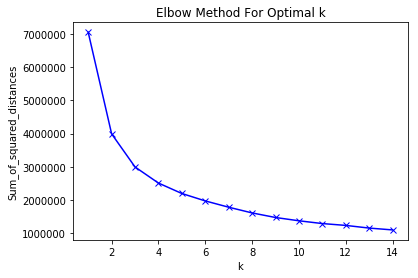

In [74]:
mms = MinMaxScaler()
mms.fit(dbf)
data_transformed = mms.transform(dbf)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dbf)
    Sum_of_squared_distances.append(km.inertia_)
 #   score = silhouette_score (?, preds, metric='euclidean')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
ass

from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=8).fit(dbf)
labels = gmm.predict_proba(dbf)
print(len(labels))
        

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [67]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(data_transformed)


labels = kmeans.predict(data_transformed)
print(type(labels))
print(len(labels))
print(len(dbf))

print(labels)

<class 'numpy.ndarray'>
458
458
[3 7 2 1 1 2 5 0 7 4 6 0 0 7 6 1 0 3 6 3 6 7 6 2 2 5 2 1 3 6 3 4 4 4 3 3 0
 3 3 2 0 1 7 6 7 7 7 5 5 2 0 7 1 0 7 7 6 2 4 6 1 7 5 5 7 5 5 6 3 7 6 0 6 7
 0 7 5 6 3 3 0 7 7 4 5 7 7 7 0 7 0 4 4 2 3 4 7 1 2 2 2 2 2 6 6 7 7 3 0 7 6
 0 7 1 6 7 0 0 0 6 3 0 7 1 3 0 6 7 7 3 4 4 3 7 6 7 3 0 6 7 7 7 0 2 5 4 7 2
 2 0 3 0 7 3 4 0 4 0 2 2 1 1 5 0 6 2 5 7 2 0 7 1 4 4 7 0 0 4 4 1 4 2 0 1 0
 6 3 5 7 7 4 5 3 3 0 1 6 6 5 3 3 3 7 4 7 2 2 7 7 7 2 2 1 0 7 3 4 5 3 6 4 6
 6 4 4 3 2 5 1 3 0 7 0 3 7 3 3 6 0 1 5 2 5 5 3 1 7 1 3 0 3 2 2 7 4 0 7 7 3
 2 3 4 1 6 3 3 6 3 7 5 3 7 3 1 7 6 5 5 0 1 3 3 7 7 3 7 6 6 7 0 7 7 4 4 6 0
 3 3 3 0 4 4 4 1 6 1 2 1 6 6 1 5 1 0 7 4 5 2 4 3 6 1 7 1 6 1 1 6 6 7 2 5 3
 4 4 1 3 7 3 4 0 2 5 6 3 7 7 5 4 7 2 3 7 7 7 0 4 2 5 5 7 1 7 5 5 7 2 2 7 1
 0 3 6 2 5 7 0 6 5 5 6 1 7 7 7 0 7 3 2 0 7 2 2 7 7 4 5 7 3 4 2 5 7 7 0 7 6
 2 2 2 2 5 4 2 3 7 0 0 2 0 2 2 2 2 3 1 0 0 0 2 5 5 3 0 4 7 7 3 0 5 5 2 2 6
 7 5 2 5 7 1 6 5 5 7 0 6 3 1]


mms = MinMaxScaler()
mms.fit(dbf)
data_transformed = mms.transform(dbf)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
listplayerdbf = []
for index,row in dbf_player.iterrows():
    listplayerdbf.append(row['Player'])
print(len(listplayerdbf))

458


listfp = []

db_general['FP'] = db_general['FP'].astype(float)
for index,row in db_general.iterrows():
    x = row['FP']
    y = row['Player']
    if(y in listplayerdbf):
        listfp.append(x)

lista = []
#listb = []
#listc = []
#listd = []
#liste = []
#listf = []
#listg = []
#listh = []
#for i in range(len(labels)):
 #   lista.append(labels[i][0]) 
 #  listb.append(labels[i][1]) 
  #  listc.append(labels[i][2]) 
   # listd.append(labels[i][3]) 
    #liste.append(labels[i][4]) 
    #listf.append(labels[i][5]) 
    #listg.append(labels[i][6]) 
    #listh.append(labels[i][7]) 
dbf_player.insert(1, "Role", labels) 


dbf_player.insert(2, 'FP', listfp) 


In [70]:
dbf_player.drop("Role",axis =1, inplace = True)
dbf_player.insert(1, "Role", labels) 

# dbf_player.insert(1, "R1", lista) 
dbf_player.insert(2, "R2", listb) 
dbf_player.insert(3, "R3", listc) 
dbf_player.insert(4, "R4", listd) 
dbf_player.insert(5, "R5", liste) 
dbf_player.insert(6, "R6", listf) 
dbf_player.insert(7, "R7", listg) 
dbf_player.insert(8, "R8", listh) 
dbf_player.insert(9, "FP", listfp) 

In [69]:
dbf_player

,Player,Role,GP,FREQ-T,PPP-T,FG%-T,EFG%-T,FT-FREQ-T,TOV-FREQ-T,SCORE-FREQ-T,...,FT-FREQ-PRM,TOV-FREQ-PRM,SCORE-FREQ-PRM,FREQ-Post,PPP-Post,FG%-Post,EFG%-Post,FT-FREQ-Post,TOV-FREQ-Post,SCORE-FREQ-Post
0,Aaron Gordon,5,78,14.0,1.04,54.2,60.3,13.6,16.8,50.0,...,11.8,2.9,38.2,13.2,0.84,42.0,42.0,14.5,9.2,42.8
1,Aaron Holiday,4,50,18.9,1.03,44.4,51.1,21.3,11.5,47.5,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,Abdel Nader,1,60,23.6,1.09,50.0,58.3,17.2,13.8,50.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,Al Horford,2,68,8.5,1.00,55.4,59.8,5.5,20.5,45.2,...,4.8,6.6,52.0,16.5,0.99,53.0,53.0,9.2,12.7,47.9
4,Al-Farouq Aminu,6,81,15.4,1.18,53.8,60.0,21.1,14.0,53.5,...,15.4,0.0,57.7,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5,Alec Burks,1,34,13.3,0.81,36.8,38.2,21.1,15.8,42.1,...,0.0,0.0,0.0,2.6,0.91,44.4,44.4,9.1,9.1,45.5
6,Alec Burks,7,17,12.5,1.00,42.9,50.0,11.1,11.1,44.4,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,Alex Abrines,0,31,17.5,0.74,31.0,39.7,0.0,6.5,29.0,...,0.0,10.0,20.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8,Alex Caruso,4,25,14.7,1.14,50.0,56.3,27.8,8.3,58.3,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
9,Alex Len,3,76,8.6,1.24,60.4,63.2,19.7,5.6,64.8,...,19.8,5.6,53.7,10.9,1.10,58.3,58.3,22.2,17.8,54.4


In [71]:
dbf_final=dbf_player[['Player','Role']]
dbf_final

,Player,Role
0,Aaron Gordon,3
1,Aaron Holiday,7
2,Abdel Nader,2
3,Al Horford,1
4,Al-Farouq Aminu,1
5,Alec Burks,2
6,Alec Burks,5
7,Alex Abrines,0
8,Alex Caruso,7
9,Alex Len,4


In [ ]:
#dbf_multiple = dbf_final[['Role']].multiply(dbf_final["FP"], axis="index")


In [ ]:
dbf_multiple.insert(0,'Player',listplayerdbf)
dbf_multiple

In [ ]:
dbf_final.to_csv('roles2.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
X = dbf_final[['R8']]
Y = dbf_final['FP']
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

count2 = 0
countn = 0

for i in range(len(labels)):
    for j in range(len(labels[i])):
        if(labels[i][j] < 0.01):
            count2 += 1     
print(count2)



In [ ]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(dbf)


labels = kmeans.predict(dbf)
print(len(labels))
print(len(dbf))


In [ ]:
dbf.insert(0, 'Player',players3)
dbf.insert(0, 'Role',labels)

In [ ]:
dbf

In [ ]:
# NBA season we will be analyzing
#year = 2019
# URL page we will scraping (see image above)
url2 = "https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=1"
url = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)


# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
print(headers)


rows = soup.findAll('tr')[1:]

player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [ ]:
df = pd.DataFrame(player_stats, columns = headers)
df.dropna(how='any', inplace=True)
df.drop(['Pos','Age','GS','PF'], axis=1, inplace = True)

In [ ]:
adf.dtypes

In [ ]:
df['G'] = df['G'].astype(float)

In [ ]:
dbg= pd.merge(dbf, df,  how='left', left_on=['Player','GP'], right_on = ['Player','G'])

In [ ]:
dbg

In [63]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count0 = 0

lista = []
listb = []
listc = []
listd = []
liste = []
listf = []
listg = []
listh = []

for index,row in dbf_final.iterrows():
    if(row['Role'] == 0):
        count0 = count0+1
        lista.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 1):
        count1 = count1+1
        listb.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 2):
        count2 = count2+1
        listc.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 3):
        count3 = count3+1
        listd.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 4):
        count4 = count4+1
        liste.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 5):
        count5 = count5+1
        listf.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 6):
        count6 = count6+1
        listg.append(row['Player'])
for index,row in dbf_final.iterrows():
    if(row['Role'] == 7):
        count7 = count7+1
        listh.append(row['Player'])

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)
print(count9)
print(lista)
print(listb)
print(listc)
print(listd)
print(liste)
print(listf)
print(listg)
print(listh)

54
58
63
44
94
65
34
46
0
0
['Alex Abrines', 'Alfonzo McKinnie', 'Allen Crabbe', 'Andre Iguodala', 'Bonzie Colson', 'Brandon Sampson', 'Cameron Reynolds', 'Chandler Hutchison', 'Dairis Bertans', 'Damion Lee', 'Dante Cunningham', "De'Anthony Melton", 'Devin Harris', 'Dillon Brooks', 'Donte DiVincenzo', 'Doug McDermott', 'Duncan Robinson', 'Furkan Korkmaz', 'Glenn Robinson III', 'Grayson Allen', 'Hamidou Diallo', 'Ian Clark', 'Isaiah Thomas', 'JR Smith', 'Jared Dudley', 'Joe Harris', 'Jordan McRae', 'Jose Calderon', 'Josh Hart', 'Julian Washburn', 'Keita Bates-Diop', 'Kenrich Williams', 'Langston Galloway', 'Malik Beasley', 'Marco Belinelli', 'Markelle Fultz', 'Mikal Bridges', 'Omri Casspi', 'Rawle Alkins', "Royce O'Neale", 'Ryan Broekhoff', 'Shake Milton', 'Solomon Hill', 'Thabo Sefolosha', 'Tony Snell', 'Torrey Craig', 'Treveon Graham', 'Troy Brown Jr.', 'Troy Daniels', 'Troy Williams', 'Tyrone Wallace', 'Walt Lemon Jr.', 'Wes Iwundu', 'Yuta Watanabe']
['Abdel Nader', 'Alec Burks', 'Au

In [ ]:
for index,row in dbf.iterrows():
    if(row['Player'] == 'LeBron James'):
        print(row['Role'])

for index,row in dbf.iterrows():
    if(row['Player'] == 'Stephen Curry'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'James Harden'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'Giannis Antetokounmpo'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'Anthony Davis'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'Joel Embiid'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'Kyrie Irving'):
        print(row['Role'])
for index,row in dbf.iterrows():
    if(row['Player'] == 'J.J. Redick'):
        print(row['Role'])

    

In [ ]:
for index,row in dbg.iterrows():
    if(row['Role'] == 3):
        if(row["Tm"] == 'LAL'):
            print(row['Player'])
    
